# Visual Representations of Deep Neural Networks

### By: Aldo Nicolás Alejandro Miranda Aguilar
### IPN - Centro de Investigación en Computación


## TensorFlow

TensorFlow (https://www.tensorflow.org/) is an open source software library for numerical computation using data flow graphs. Nodes in the graph represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) communicated between them. The flexible architecture allows you to deploy computation to one or more CPUs or GPUs in a desktop, server, or mobile device with a single API. TensorFlow was originally developed by researchers and engineers working on the Google Brain Team within Google's Machine Intelligence research organization for the purposes of conducting machine learning and deep neural networks research, but the system is general enough to be applicable in a wide variety of other domains as well.


## Deep Convolutional Networks

Almost 30 years of computer vision and machine learning research based on images takes an approach to processing images where you take an image, convolve it with a set of edge detectors like the gabor filter we created, and then find some thresholding of this image to find more interesting features, such as corners, or look at histograms of the number of some orientation of edges in a particular window.  

A seminal shift in the perceived capabilities of deep neural networks occurred in 2012.  A network dubbed AlexNet, after its primary author, Alex Krizevsky, achieved remarkable performance on one of the most difficult computer vision datasets at the time, ImageNet.  **ImageNet** is a dataset used in a yearly challenge called the ImageNet Large Scale Visual Recognition Challenge (ILSVRC), started in 2010.  The dataset contains nearly 1.2 million images composed of 1000 different types of objects.  Each object has anywhere between 600 - 1200 different images. Now, let's look at a state-of-the-art network that has already been trained on ImageNet.


## Loading a Pretrained Network

We can use an existing network that has been trained by loading the model's weights into a network definition.  The network definition is basically saying what are the set of operations in the tensorflow graph.  So how is the image manipulated, filtered, in order to get from an input image to a probability saying which one among 1000 possible objects is the image describing.  The model's weights are the values of every parameter in the network learned through gradient descent. To get the files required for these models, we need to download them from the web.

First, let's import some necessary libraries.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import IPython.display as ipyd
from libs import nb_utils

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def make_gif(imgs, interval=0.1, dpi=72,
              save_gif=True, saveto='animation.gif',
              show_gif=False, cmap=None):
    imgs = np.asarray(imgs)
    h, w, *c = imgs[0].shape
    fig, ax = plt.subplots(figsize=(np.round(w / dpi), np.round(h / dpi)))
    fig.subplots_adjust(bottom=0)
    fig.subplots_adjust(top=1)
    fig.subplots_adjust(right=1)
    fig.subplots_adjust(left=0)
    ax.set_axis_off()

    if cmap is not None:
        axs = list(map(lambda x: [
            ax.imshow(x, cmap=cmap)], imgs))
    else:
        axs = list(map(lambda x: [
            ax.imshow(x)], imgs))

    ani = animation.ArtistAnimation(
        fig, axs, interval=interval*1000, repeat_delay=0, blit=True)

    if save_gif:
        ani.save(saveto, writer='imagemagick', dpi=dpi)

    if show_gif:
        plt.show()

    return ani

Start a Tensorflow session:

In [3]:
sess = tf.InteractiveSession()

Now we'll load Google's Inception model, which is a pretrained network for classification built using the ImageNet database. 

In [4]:
import os
from tensorflow.python.platform import gfile
from skimage.transform import resize as imresize

def preprocess(img, crop=True, resize=True, dsize=(299, 299)):
    if crop:
        crop = np.min(img.shape[:2])
        r = (img.shape[0] - crop) // 2
        c = (img.shape[1] - crop) // 2
        cropped = img[r: r + crop, c: c + crop]
    else:
        cropped = img

    if resize:
        rsz = imresize(cropped, dsize, preserve_range=True)
    else:
        rsz = cropped

    if rsz.ndim == 2:
        rsz = rsz[..., np.newaxis]

    rsz = rsz.astype(np.float32)
    # subtract imagenet mean
    return (rsz - 117)


def deprocess(img):
    return np.clip(img + 117, 0, 255).astype(np.uint8)

model = './inception/tensorflow_inception_graph.pb'
labels = './inception/imagenet_comp_graph_label_strings.txt'

txt = open(labels).readlines()
synsets = [(key, val.strip()) for key, val in enumerate(txt)]

# Load the saved graph
with gfile.GFile(model, 'rb') as f:
    graph_def = tf.GraphDef()
    try:
        graph_def.ParseFromString(f.read())
    except:
        print('try adding PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python' +
              'to environment.  e.g.:\n' +
              'PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python ipython\n' +
              'See here for info: ' +
              'https://github.com/tensorflow/tensorflow/issues/582')
net = {
    'graph_def': graph_def,
    'labels': synsets,
    'preprocess': preprocess,
    'deprocess': deprocess
}

We can visualize the graph definition using the `nb_utils` module's `show_graph` function.  This function is taken from an example in the Tensorflow repo and uses Tensorboard, Tensorflow's web interface for visualizing graphs and training performance.

In [5]:
nb_utils.show_graph(net['graph_def'])

We'll now get the graph from the storage container, and tell tensorflow to use this as its own graph.  This will add all the computations we need to compute the entire deep net, as well as all of the pre-trained parameters.

In [6]:
tf.import_graph_def(net['graph_def'], name='inception')

In [7]:
net['labels']

[(0, 'dummy'),
 (1, 'kit fox'),
 (2, 'English setter'),
 (3, 'Siberian husky'),
 (4, 'Australian terrier'),
 (5, 'English springer'),
 (6, 'grey whale'),
 (7, 'lesser panda'),
 (8, 'Egyptian cat'),
 (9, 'ibex'),
 (10, 'Persian cat'),
 (11, 'cougar'),
 (12, 'gazelle'),
 (13, 'porcupine'),
 (14, 'sea lion'),
 (15, 'malamute'),
 (16, 'badger'),
 (17, 'Great Dane'),
 (18, 'Walker hound'),
 (19, 'Welsh springer spaniel'),
 (20, 'whippet'),
 (21, 'Scottish deerhound'),
 (22, 'killer whale'),
 (23, 'mink'),
 (24, 'African elephant'),
 (25, 'Weimaraner'),
 (26, 'soft-coated wheaten terrier'),
 (27, 'Dandie Dinmont'),
 (28, 'red wolf'),
 (29, 'Old English sheepdog'),
 (30, 'jaguar'),
 (31, 'otterhound'),
 (32, 'bloodhound'),
 (33, 'Airedale'),
 (34, 'hyena'),
 (35, 'meerkat'),
 (36, 'giant schnauzer'),
 (37, 'titi'),
 (38, 'three-toed sloth'),
 (39, 'sorrel'),
 (40, 'black-footed ferret'),
 (41, 'dalmatian'),
 (42, 'black-and-tan coonhound'),
 (43, 'papillon'),
 (44, 'skunk'),
 (45, 'Staffordsh

Now, let's have a look at the graph's operations:

In [8]:
g = tf.get_default_graph()
names = [op.name for op in g.get_operations()]
print(names)

['inception/input', 'inception/conv2d0_w', 'inception/conv2d0_b', 'inception/conv2d1_w', 'inception/conv2d1_b', 'inception/conv2d2_w', 'inception/conv2d2_b', 'inception/mixed3a_1x1_w', 'inception/mixed3a_1x1_b', 'inception/mixed3a_3x3_bottleneck_w', 'inception/mixed3a_3x3_bottleneck_b', 'inception/mixed3a_3x3_w', 'inception/mixed3a_3x3_b', 'inception/mixed3a_5x5_bottleneck_w', 'inception/mixed3a_5x5_bottleneck_b', 'inception/mixed3a_5x5_w', 'inception/mixed3a_5x5_b', 'inception/mixed3a_pool_reduce_w', 'inception/mixed3a_pool_reduce_b', 'inception/mixed3b_1x1_w', 'inception/mixed3b_1x1_b', 'inception/mixed3b_3x3_bottleneck_w', 'inception/mixed3b_3x3_bottleneck_b', 'inception/mixed3b_3x3_w', 'inception/mixed3b_3x3_b', 'inception/mixed3b_5x5_bottleneck_w', 'inception/mixed3b_5x5_bottleneck_b', 'inception/mixed3b_5x5_w', 'inception/mixed3b_5x5_b', 'inception/mixed3b_pool_reduce_w', 'inception/mixed3b_pool_reduce_b', 'inception/mixed4a_1x1_w', 'inception/mixed4a_1x1_b', 'inception/mixed4a_3

The input to the graph is stored in the first tensor output, and the probability of the 1000 possible objects is in the last layer:

In [9]:
input_name = names[0] + ':0'
x = g.get_tensor_by_name(input_name)

In [10]:
softmax = g.get_tensor_by_name(names[-1] + ':0')

## Predicting with the Inception Network

### scikit-image

scikit-image (formerly scikits.image) is an open source image processing library for the Python programming language. It includes algorithms for segmentation, geometric transformations, color space manipulation, analysis, filtering, morphology, feature detection, and more. It is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

0 231


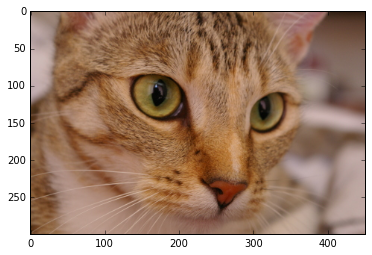

In [11]:
from skimage.data import chelsea
og = chelsea()
plt.imshow(og)
print(og.min(), og.max())

We'll crop and resize the image to 299 x 299 pixels. I've provided a simple helper function which will do this for us:

In [12]:
img = preprocess(og)
print(og.shape), print(img.shape)

(300, 451, 3)
(299, 299, 3)


(None, None)

In [13]:
print(img.min(), img.max())

-117.0 94.8122


Our images must be shaped as a 4-dimensional shape describing the number of images, height, width, and number of channels.  So our original 3-dimensional image of height, width, channels needs an additional dimension on the 0th axis.

In [14]:
img_4d = img[np.newaxis]
print(img_4d.shape)

(1, 299, 299, 3)


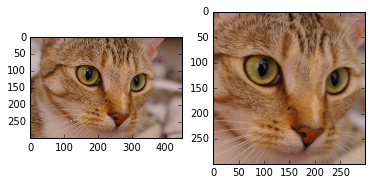

In [15]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(og)

axs[1].imshow(deprocess(img))

In [16]:
res = np.squeeze(softmax.eval(feed_dict={x: img_4d}))

In [17]:
# Instead of just 1 output, there will be 16 outputs of 1008 probabilities.
# We only use the first 1000 probabilities (the extra ones are for negative/unseen labels)
res.shape

(16, 1008)

The result of the network is a 1000 element vector, with probabilities of each class.  Inside our `net` dictionary are the labels for every element.  We can sort these and use the labels of the 1000 classes to see what the top 5 predicted probabilities and labels are:

In [18]:
# Note that this is one way to aggregate the different probabilities.  We could also
# take the argmax.
res = np.mean(res, 0)
res = res / np.sum(res)

In [19]:
print([(res[idx], net['labels'][idx])
       for idx in res.argsort()[-5:][::-1]])

[(0.49391869, (174, 'tabby')), (0.3919909, (8, 'Egyptian cat')), (0.11271198, (55, 'tiger cat')), (0.0012322091, (201, 'lynx')), (5.6441571e-05, (153, 'snow leopard'))]


## Visualizing Filters

Wow so it works!  But how!?  Well that's an ongoing research question.  There has been a lot of great developments in the last few years to help us understand what might be happening.  Let's try to first visualize the weights of the convolution filters.

In [20]:
W = g.get_tensor_by_name('inception/conv2d0_w:0')
W_eval = W.eval()
print(W_eval.shape)

(7, 7, 3, 64)


With other datasets, such as MNIST, our input number of filters would be 1, since the input number of channels is also 1, as all of MNIST is grayscale.  But in this case, our input number of channels is 3, and so the input number of convolution filters is also 3. 

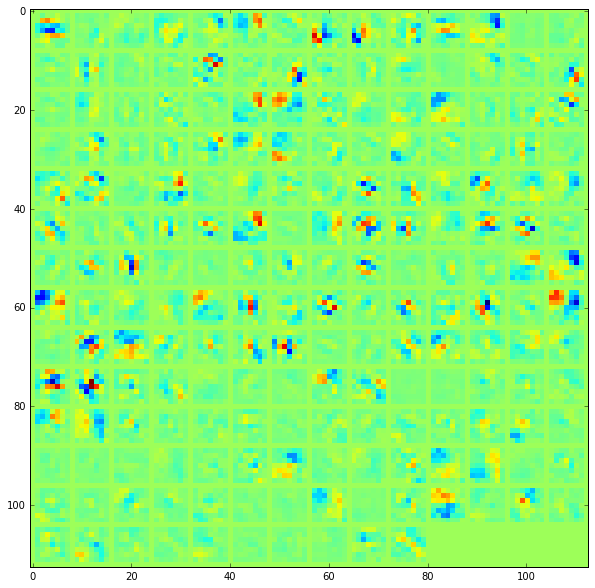

In [21]:
from libs import utils
W_montage = utils.montage_filters(W_eval)
plt.figure(figsize=(10,10))
plt.imshow(W_montage, interpolation='nearest')

Or, we can also try to look at them as RGB filters, showing the influence of each color channel, for each neuron or output filter.

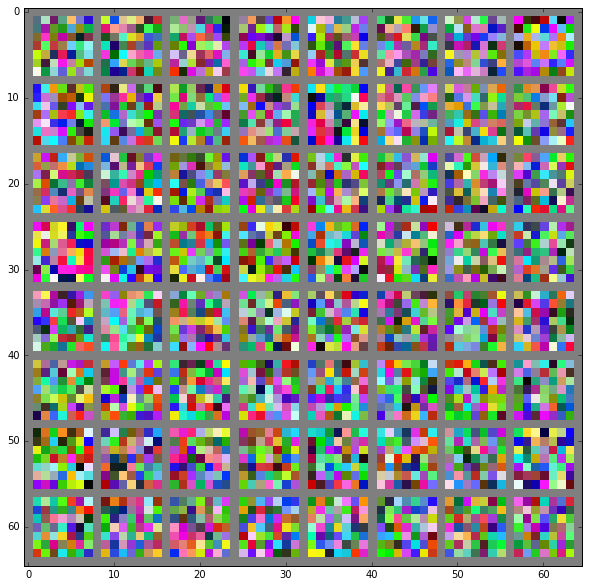

In [22]:
Ws = [utils.montage_filters(W_eval[:, :, [i], :]) for i in range(3)]
Ws = np.rollaxis(np.array(Ws), 0, 3)
plt.figure(figsize=(10,10))
plt.imshow(Ws, interpolation='nearest')

In order to better see what these are doing, let's normalize the filters range:

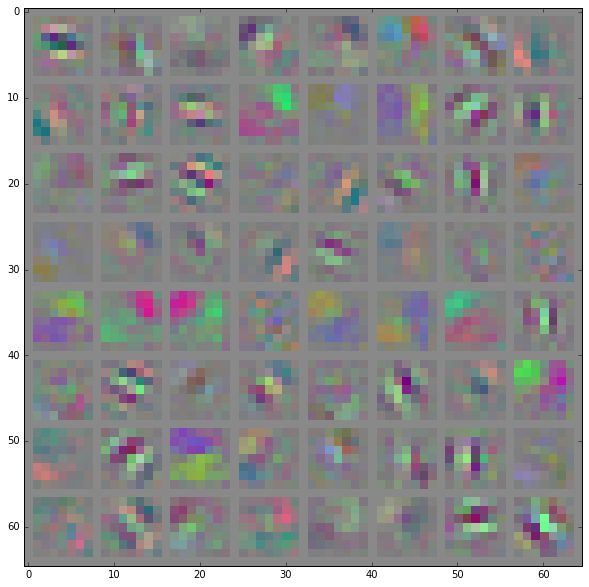

In [23]:
np.min(Ws), np.max(Ws)
Ws = (Ws / np.max(np.abs(Ws)) * 128 + 128).astype(np.uint8)
plt.figure(figsize=(10,10))
plt.imshow(Ws, interpolation='nearest')

We can _probably_ guess what some of these are doing.  They are responding to edges, corners, and center-surround or some kind of contrast of two things, like red, green, blue yellow, which interestingly is also what neuroscience of vision tells us about how the human vision identifies color, which is through opponency of red/green and blue/yellow.  To get a better sense, we can try to look at the output of the convolution:

In [24]:
feature = g.get_tensor_by_name('inception/conv2d0_pre_relu:0')

Let's look at the shape:

In [25]:
layer_shape = tf.shape(feature).eval(feed_dict={x:img_4d})
print(layer_shape)

[  1 150 150  64]


So our original image which was 1 x 299 x 299 x 3 color channels, now has 64 new channels of information.  The image's height and width are also halved, because of the stride of 2 in the convolution.  We've just seen what each of the convolution filters look like.  Let's try to see how they filter the image now by looking at the resulting convolution.

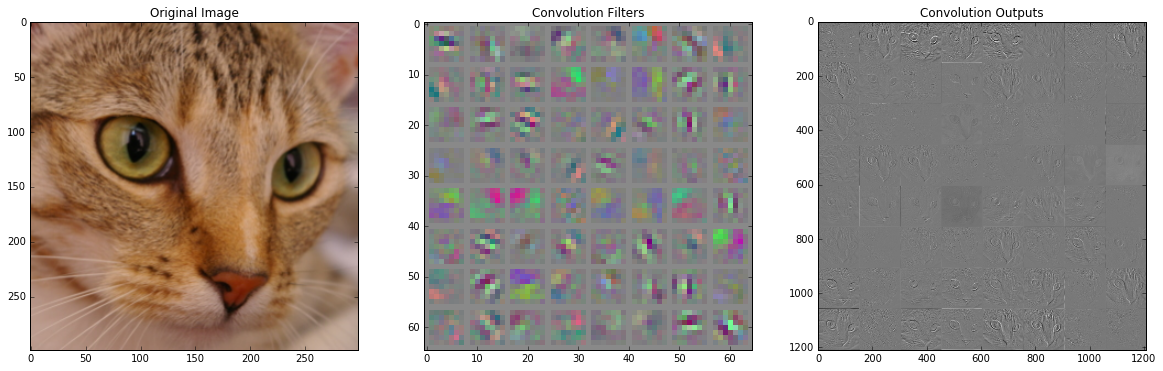

In [26]:
f = feature.eval(feed_dict={x: img_4d})
montage = utils.montage_filters(np.rollaxis(np.expand_dims(f[0], 3), 3, 2))
fig, axs = plt.subplots(1, 3, figsize=(20, 10))
axs[0].imshow(deprocess(img))
axs[0].set_title('Original Image')
axs[1].imshow(Ws, interpolation='nearest')
axs[1].set_title('Convolution Filters')
axs[2].imshow(montage, cmap='gray')
axs[2].set_title('Convolution Outputs')

It's a little hard to see what's happening here but let's try.  The third filter for instance seems to be a lot like the gabor filter, it responds to horizontal edges, since it has a bright component at the top, and a dark component on the bottom.  Looking at the output of the convolution, we can see that the horizontal edges really pop out.

## Visualizing the Gradient

So this is a pretty useful technique for the first convolution layer.  But when we get to the next layer, all of sudden we have 64 different channels of information being fed to more convolution filters of some very high dimensions.  It's very hard to conceptualize that many dimensions, let alone also try and figure out what it could be doing with all the possible combinations it has with other neurons in other layers.

If we want to understand what the deeper layers are really doing, we're going to have to start to use backprop to show us the gradients of a particular neuron with respect to our input image.  Let's visualize the network's gradient activation when backpropagated to the original input image.  This is effectively telling us which pixels are responding to the predicted class or given neuron.

We use a forward pass up to the layer that we are interested in, and then a backprop to help us understand what pixels in particular contributed to the final activation of that layer.  We will need to create an operation which will find the max neuron of all activations in a layer, and then calculate the gradient of that objective with respect to the input image.

In [27]:
feature = g.get_tensor_by_name('inception/conv2d0_pre_relu:0')
gradient = tf.gradients(tf.reduce_max(feature, 3), x)

When we run this network now, we will specify the gradient operation we've created, instead of the softmax layer of the network.  This will run a forward prop up to the layer we asked to find the gradient with, and then run a back prop all the way to the input image.

In [28]:
res = sess.run(gradient, feed_dict={x: img_4d})[0]

Let's visualize the original image and the output of the backpropagated gradient:

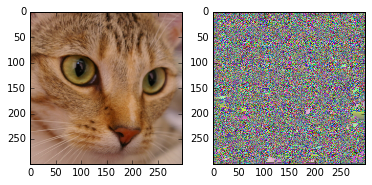

In [29]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(deprocess(img))
axs[1].imshow(res[0])

Surely looks like a complete mess.  What we can do is normalize the activations in a way that let's us see it more in terms of the normal range of color values.

In [30]:
def normalize(img, s=0.1):
    z = img / np.std(img)
    return np.uint8(np.clip(
        (z - z.mean()) / max(z.std(), 1e-4) * s + 0.5,
        0, 1) * 255)

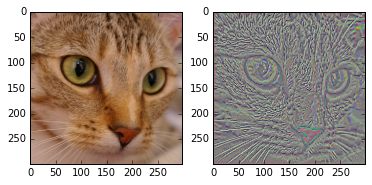

In [31]:
r = normalize(res)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(deprocess(img))
axs[1].imshow(r[0])

It's starting to make sense!  There are some strong edges and we can really see what colors are changing along those edges.

We can try within individual layers as well, pulling out individual neurons to see what each of them are responding to.  Let's first create a few functions which will help us visualize a single neuron in a layer, and every neuron of a layer:

In [32]:
def compute_gradient(input_placeholder, img, layer_name, neuron_i):
    feature = g.get_tensor_by_name(layer_name)
    gradient = tf.gradients(tf.reduce_mean(feature[:, :, :, neuron_i]), x)
    res = sess.run(gradient, feed_dict={input_placeholder: img})[0]
    return res

def compute_gradients(input_placeholder, img, layer_name):
    feature = g.get_tensor_by_name(layer_name)
    layer_shape = tf.shape(feature).eval(feed_dict={input_placeholder: img})
    gradients = []
    for neuron_i in range(layer_shape[-1]):
        gradients.append(compute_gradient(input_placeholder, img, layer_name, neuron_i))
    return gradients

Now we can pass in a layer name, and see the gradient of every neuron in that layer with respect to the input image as a montage.  Let's try the second convolutional layer.  This can take awhile depending on your computer:

In [33]:
gradients = compute_gradients(x, img_4d, 'inception/conv2d1_pre_relu:0')
gradients_norm = [normalize(gradient_i[0]) for gradient_i in gradients]
montage = utils.montage(np.array(gradients_norm))

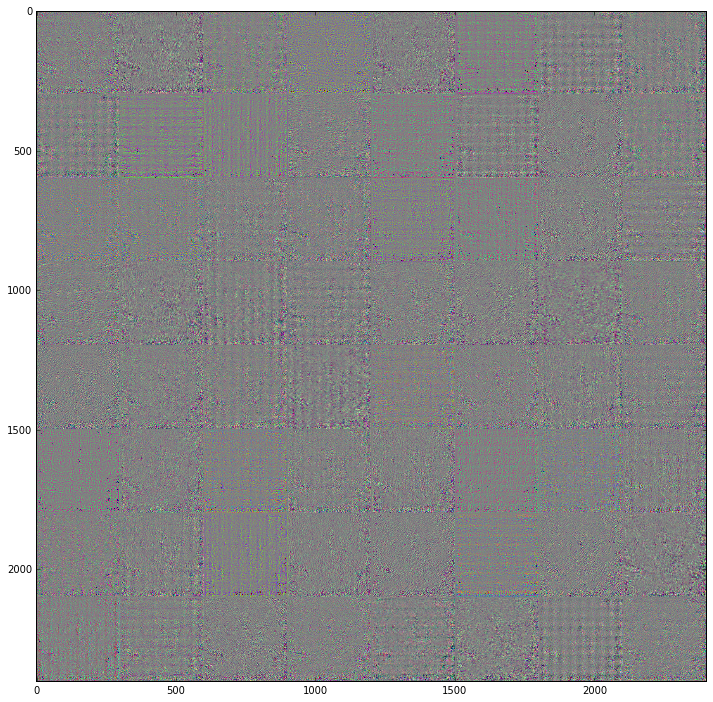

In [34]:
plt.figure(figsize=(12, 12))
plt.imshow(montage)

So it's clear that each neuron is responding to some type of feature and seem to respond in different ways across the image. Let's try to get a sense of how the activations in each layer progress. We can get every max pooling layer like so:

In [35]:
features = [name for name in names if 'maxpool' in name.split()[-1]]
print(features)

['inception/maxpool0', 'inception/maxpool1', 'inception/maxpool4', 'inception/maxpool10']


MaxPooling is a simple operation. You can think of it like a convolution, except instead of using a learned kernel, it will just find the maximum value in the window, for performing "max pooling", or find the average value, for performing "average pooling".

We'll now loop over every feature and create an operation that first will find the maximally activated neuron.  It will then find the sum of all activations across every pixel and input channel of this neuron, and then calculate its gradient with respect to the input image.

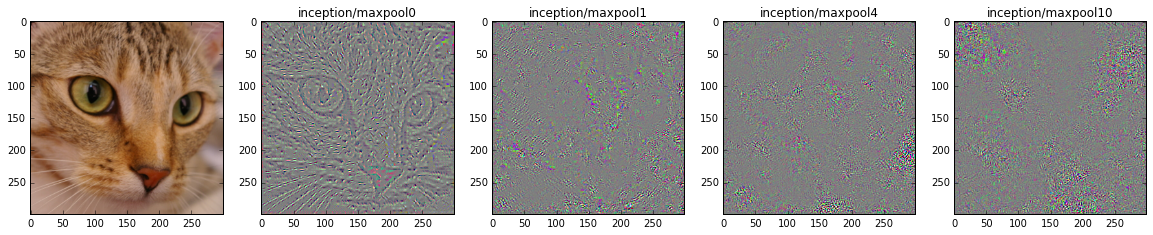

In [36]:
n_plots = len(features) + 1
fig, axs = plt.subplots(1, n_plots, figsize=(20, 5))
base = img_4d
axs[0].imshow(deprocess(img))
for feature_i, featurename in enumerate(features):
    feature = g.get_tensor_by_name(featurename + ':0')
    neuron = tf.reduce_max(feature, len(feature.get_shape())-1)
    gradient = tf.gradients(tf.reduce_sum(neuron), x)
    this_res = sess.run(gradient[0], feed_dict={x: base})[0]
    axs[feature_i+1].imshow(normalize(this_res))
    axs[feature_i+1].set_title(featurename)

To really understand what's happening in these later layers, we're going to have to experiment with some other visualization techniques.

# Deep Dreaming

Sometime in May of 2015, Google's researcher, Alexander Mordvintsev, took a deep network meant to recognize objects in an image, and instead used it to *generate new objects in an image*.  The internet quickly exploded after seeing one of the images it produced.  Soon after, Google posted a blog entry on how to perform the technique they re-dubbed "Inceptionism", and tons of interesting outputs were soon created.  Somehow the name Deep Dreaming caught on, and tons of new creative applications came out, from twitter bots (DeepForger), to streaming television (twitch.tv), to apps, it was soon everywhere.

What Deep Dreaming is doing is taking the backpropagated gradient activations and simply adding it back to the image, running the same process again and again in a loop. We're really pushing the network in a direction, and seeing what happens when left to its own means.  What it is effectively doing is amplifying whatever our objective is, but we get to see how that objective is optimized in the input space rather than deep in the network in some arbitrarily high dimensional space that no one can understand.

There are many tricks one can add to this idea, such as blurring, adding constraints on the total activations, decaying the gradient, infinitely zooming into the image by cropping and scaling, adding jitter by randomly moving the image around, or plenty of other ideas waiting to be explored.

## Simplest Approach

Let's try the simplest approach for deep dream using a few of these layers.  We're going to try the first max pooling layer to begin with.  We'll specify our objective which is to follow the gradient of the mean of the selected layers's activation.  What we should see is that same objective being amplified so that we can start to understand in terms of the input image what the mean activation of that layer tends to like, or respond to.  We'll also produce a gif of every few frames.

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 

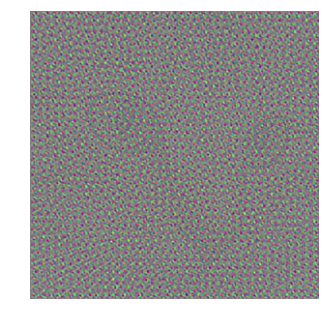

In [37]:
# Rescale to 0-1 range
img_4d = img_4d / np.max(img_4d)

# Get the max pool layer
layer = g.get_tensor_by_name('inception/maxpool0:0')

# Find the gradient of this layer's mean activation with respect to the input image
gradient = tf.gradients(tf.reduce_mean(layer), x)

# Copy the input image as we'll add the gradient to it in a loop
img_copy = img_4d.copy()

# We'll run it for 50 iterations
n_iterations = 50

# Think of this as our learning rate.  This is how much of the gradient we'll add to the input image
step = 1.0

# Every 10 iterations, we'll add an image to a GIF
gif_step = 10

# Storage for our GIF
imgs = []
for it_i in range(n_iterations):
    print(it_i, end=', ')

    # This will calculate the gradient of the layer we chose with respect to the input image.
    this_res = sess.run(gradient[0], feed_dict={x: img_copy})[0]

    # Let's normalize it by the maximum activation
    this_res /= (np.max(np.abs(this_res)) + 1e-8)

    # Then add it to the input image
    img_copy += this_res * step

    # And add to our gif
    if it_i % gif_step == 0:
        imgs.append(normalize(img_copy[0]))

# Build the gif
make_gif(imgs, saveto='1-simplest-mean-layer.gif')

In [38]:
ipyd.Image(url='1-simplest-mean-layer.gif', height=200, width=200)

What we can see is pretty quickly, the activations tends to pick up the fine detailed edges. Their structure is very local, meaning they are really describing information at a very small scale.

We could also specify the maximal neuron's mean activation, instead of the mean of the entire layer:

In [39]:
# Find the maximal neuron in a layer
neuron = tf.reduce_max(layer, len(layer.get_shape())-1)
# Then find the mean over this neuron
gradient = tf.gradients(tf.reduce_mean(neuron), x)

The rest is exactly the same as before:

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 

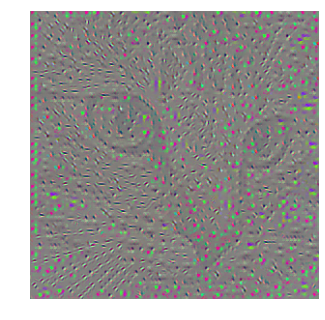

In [40]:
img_copy = img_4d.copy()
imgs = []
for it_i in range(n_iterations):
    print(it_i, end=', ')
    this_res = sess.run(gradient[0], feed_dict={x: img_copy})[0]
    this_res /= (np.max(np.abs(this_res)) + 1e-8)
    img_copy += this_res * step
    if it_i % gif_step == 0:
        imgs.append(normalize(img_copy[0]))
make_gif(imgs, saveto='1-simplest-max-neuron.gif')

In [41]:
ipyd.Image(url='1-simplest-max-neuron.gif', height=200, width=200)

What we should see here is how the maximal neuron in a layer's activation is slowly maximized through gradient ascent. So over time, we're increasing the overall activation of the neuron we asked for.

Let's try doing this for each of our max pool layers, in increasing depth, and let it run a little longer.  This will take a long time depending on one's machine.

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 

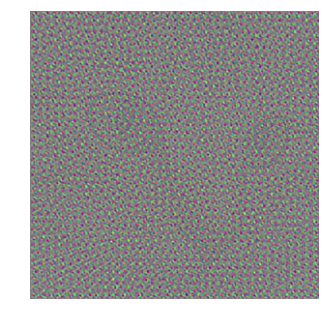

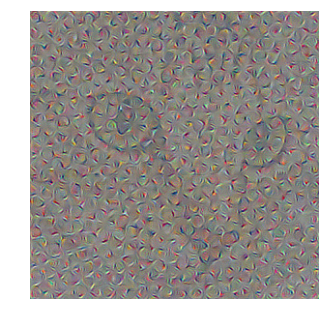

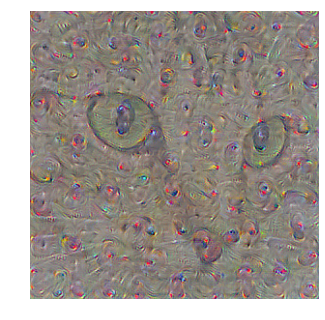

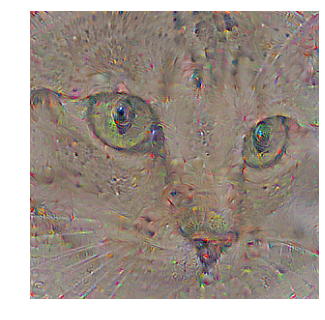

In [42]:
# For each max pooling feature, we'll produce a GIF
for feature_i in features:
    layer = g.get_tensor_by_name(feature_i + ':0')
    gradient = tf.gradients(tf.reduce_mean(layer), x)
    img_copy = img_4d.copy()
    imgs = []
    for it_i in range(n_iterations):
        print(it_i, end=', ')
        this_res = sess.run(gradient[0], feed_dict={x: img_copy})[0]
        this_res /= (np.max(np.abs(this_res)) + 1e-8)
        img_copy += this_res * step
        if it_i % gif_step == 0:
            imgs.append(normalize(img_copy[0]))
    make_gif(
        imgs, saveto='1-simplest-' + feature_i.split('/')[-1] + '.gif')

When we look at the outputs of these, we should see the representations in corresponding layers being amplified on the original input image.  As we get to later layers, it really starts to appear to hallucinate, and the patterns start to get more complex.  That's not all though.  The patterns also seem to grow larger.  What that means is that at later layers, the representations span a larger part of the image.  In neuroscience, we might say that this has a larger receptive field, since it is receptive to the content in a wider visual field.

Let's try the same thing except now we'll feed in noise instead of an image:

In [43]:
# Create some noise, centered at gray
img_noise = preprocess(
    (np.random.randint(100, 150, size=(299, 299, 3))))[np.newaxis]
print(img_noise.min(), img_noise.max())

-17.0 32.0


And the rest is the same:

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 

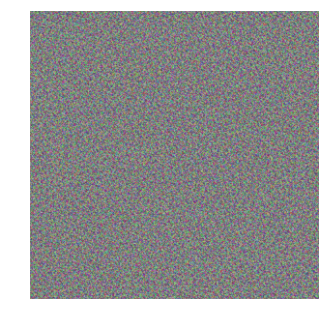

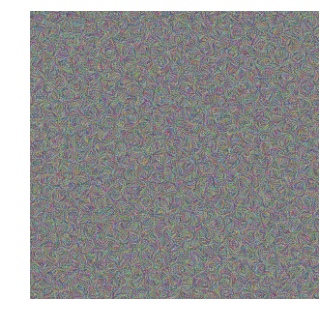

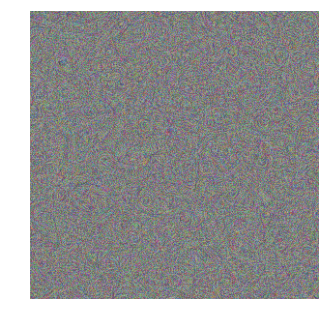

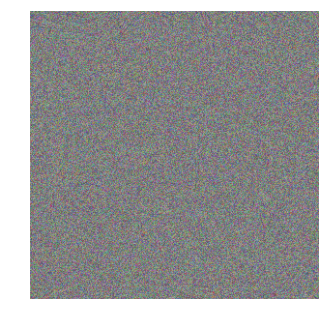

In [44]:
for feature_i in features:
    layer = g.get_tensor_by_name(feature_i + ':0')
    gradient = tf.gradients(tf.reduce_mean(layer), x)
    img_copy = img_noise.copy()
    imgs = []
    for it_i in range(n_iterations):
        print(it_i, end=', ')
        this_res = sess.run(gradient[0], feed_dict={x: img_copy})[0]
        this_res /= (np.max(np.abs(this_res)) + 1e-8)
        img_copy += this_res * step
        if it_i % gif_step == 0:
            imgs.append(normalize(img_copy[0]))
    make_gif(
        imgs, saveto='1-simplest-noise-' + feature_i.split('/')[-1] + '.gif')

What we should see is that patterns start to emerge, and with higher and higher complexity as we get deeper into the network.


## Specifying the Objective

Let's summarize a bit what we've done.  What we're doing is let the input image's activation at some later layer or neuron determine what we want to optimize.  We feed an image into the network and see what its activations are for a given neuron or entire layer are by backproping the gradient of that activation back to the input image.  Remember, the gradient is just telling us how things change.  So by following the direction of the gradient, we're going up the gradient, or ascending, and maximizing the selected layer or neuron's activation by changing our input image.

By going up the gradient, we're saying, let's maximize this neuron or layer's activation.  That's different to what we we're doing with gradient descent of a cost function.  Because that was a cost function, we wanted to minimize it, and we were following the negative direction of our gradient.  So the only difference now is we are following the positive direction of our gradient, and performing gradient ascent.

We can also explore specifying a particular gradient activation that we want to maximize.  So rather than simply maximizing its activation, we'll specify what we want the activation to look like, and follow the gradient to get us there.  For instance, let's say we want to only have a particular neuron active, and nothing else.  We can do that by creating an array of 0s the shape of one of our layers, and then filling in 1s for the output of that neuron:

In [45]:
# Let's pick one of the later layers
layer = g.get_tensor_by_name('inception/mixed5b_pool_reduce_pre_relu:0')

# And find its shape
layer_shape = tf.shape(layer).eval(feed_dict={x:img_4d})

# We can find out how many neurons it has by feeding it an image and
# calculating the shape.  The number of output channels is the last dimension.
n_els = tf.shape(layer).eval(feed_dict={x:img_4d})[-1]

# Let's pick a random output channel
neuron_i = np.random.randint(n_els)

# And we'll create an activation of this layer which is entirely 0
layer_vec = np.zeros(layer_shape)

# Except for the randomly chosen neuron which will be full of 1s
layer_vec[..., neuron_i] = 1

# We'll go back to finding the maximal neuron in a layer
neuron = tf.reduce_max(layer, len(layer.get_shape())-1)

# And finding the mean over this neuron
gradient = tf.gradients(tf.reduce_mean(neuron), x)

We then feed this into our `feed_dict` parameter and do the same thing as before, ascending the gradient.  We'll try this for a few different neurons to see what they look like.

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 

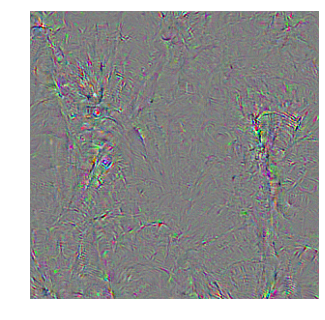

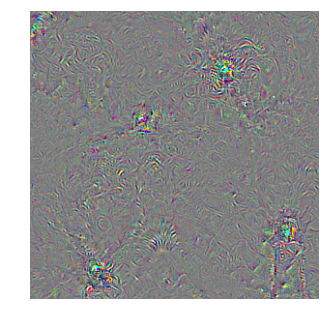

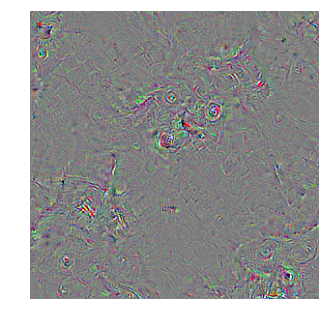

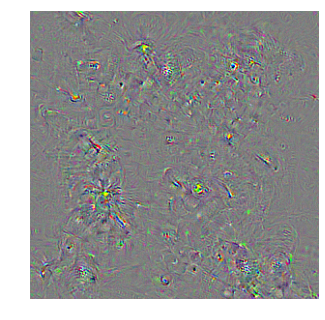

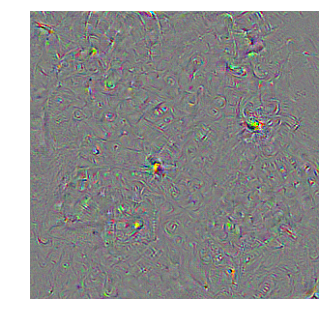

In [46]:
n_iterations = 30
for i in range(5):
    neuron_i = np.random.randint(n_els)
    layer_vec = np.zeros(layer_shape)
    layer_vec[..., neuron_i] = 1
    img_copy = img_noise.copy() / 255.0
    imgs = []
    for it_i in range(n_iterations):
        print(it_i, end=', ')
        this_res = sess.run(gradient[0], feed_dict={
            x: img_copy,
            layer: layer_vec})[0]
        this_res /= (np.max(np.abs(this_res)) + 1e-8)
        img_copy += this_res * step
        if it_i % gif_step == 0:
            imgs.append(normalize(img_copy[0]))
    make_gif(imgs, saveto='2-objective-' + str(neuron_i) + '.gif')

So there is definitely something very interesting happening in each of these neurons.  Even though each image starts off exactly the same, from the same noise image, they each end up in a very different place.  What we're seeing is how each neuron we've chosen seems to be encoding something complex.  They even somehow sort of look like a house, or a dog, or a fish, or person or something in between.

Since our network is trained on objects, we know what each neuron of the last layer should represent.  So we can actually try this with the very last layer, the final layer which we know should represent 1 of 1000 possible objects.  Let's see how to do this.  Let's first find a good neuron:

In [47]:
net['labels']

[(0, 'dummy'),
 (1, 'kit fox'),
 (2, 'English setter'),
 (3, 'Siberian husky'),
 (4, 'Australian terrier'),
 (5, 'English springer'),
 (6, 'grey whale'),
 (7, 'lesser panda'),
 (8, 'Egyptian cat'),
 (9, 'ibex'),
 (10, 'Persian cat'),
 (11, 'cougar'),
 (12, 'gazelle'),
 (13, 'porcupine'),
 (14, 'sea lion'),
 (15, 'malamute'),
 (16, 'badger'),
 (17, 'Great Dane'),
 (18, 'Walker hound'),
 (19, 'Welsh springer spaniel'),
 (20, 'whippet'),
 (21, 'Scottish deerhound'),
 (22, 'killer whale'),
 (23, 'mink'),
 (24, 'African elephant'),
 (25, 'Weimaraner'),
 (26, 'soft-coated wheaten terrier'),
 (27, 'Dandie Dinmont'),
 (28, 'red wolf'),
 (29, 'Old English sheepdog'),
 (30, 'jaguar'),
 (31, 'otterhound'),
 (32, 'bloodhound'),
 (33, 'Airedale'),
 (34, 'hyena'),
 (35, 'meerkat'),
 (36, 'giant schnauzer'),
 (37, 'titi'),
 (38, 'three-toed sloth'),
 (39, 'sorrel'),
 (40, 'black-footed ferret'),
 (41, 'dalmatian'),
 (42, 'black-and-tan coonhound'),
 (43, 'papillon'),
 (44, 'skunk'),
 (45, 'Staffordsh

In [48]:
# let's try a school bus.
neuron_i = 962
print(net['labels'][neuron_i])

(962, 'school bus')


In [49]:
# We'll pick the very last layer
layer = g.get_tensor_by_name(names[-1] + ':0')

# Then find the max activation of this layer
gradient = tf.gradients(tf.reduce_max(layer), x)

# We'll find its shape and create the activation we want to maximize w/ gradient ascent
layer_shape = tf.shape(layer).eval(feed_dict={x: img_noise})
layer_vec = np.zeros(layer_shape)
layer_vec[..., neuron_i] = 1

And then train just like before:

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

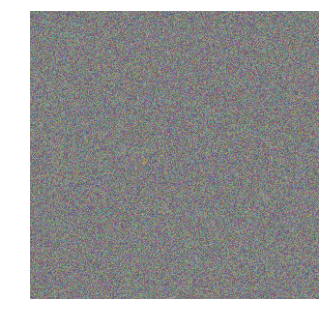

In [50]:
n_iterations = 100
gif_step = 10

img_copy = img_noise.copy()
imgs = []
for it_i in range(n_iterations):
    print(it_i, end=', ')
    this_res = sess.run(gradient[0], feed_dict={
        x: img_copy,
        layer: layer_vec})[0]
    this_res /= (np.max(np.abs(this_res)) + 1e-8)
    img_copy += this_res * step
    if it_i % gif_step == 0:
        imgs.append(normalize(img_copy[0]))
make_gif(imgs, saveto='2-object-' + str(neuron_i) + '.gif')

In [51]:
ipyd.Image(url='2-object-962.gif', height=600, width=600)

So what we should see is the noise image become more like patterns that might appear on a school bus.

## Decaying the Gradient

There is a lot we can explore with this process to get a clearer picture.  Some of the more interesting visualizations come about through regularization techniques such as smoothing the activations every so often, or clipping the gradients to a certain range.  We'll see how all of these together can help us get a much cleaner image.  We'll start with decay.  This will slowly reduce the range of values:

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

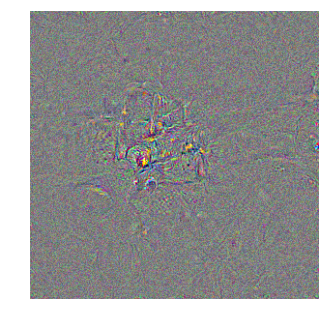

In [52]:
decay = 0.95

img_copy = img_noise.copy()
imgs = []
for it_i in range(n_iterations):
    print(it_i, end=', ')
    this_res = sess.run(gradient[0], feed_dict={
        x: img_copy,
        layer: layer_vec})[0]
    this_res /= (np.max(np.abs(this_res)) + 1e-8)
    img_copy += this_res * step
    img_copy *= decay
    if it_i % gif_step == 0:
        imgs.append(normalize(img_copy[0]))
make_gif(imgs, saveto='3-decay-' + str(neuron_i) + '.gif')

In [53]:
ipyd.Image(url='3-decay-962.gif', height=400, width=400)

## Blurring the Gradient

Let's now try and see how blurring with a gaussian changes the visualization.

In [54]:
# Let's get a gaussian filter
from scipy.ndimage.filters import gaussian_filter

# Which we'll smooth with a standard deviation of 0.5
sigma = 1.0

# And we'll smooth it every 4 iterations
blur_step = 5

Now during our training, we'll smooth every `blur_step` iterations with the given `sigma`.

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

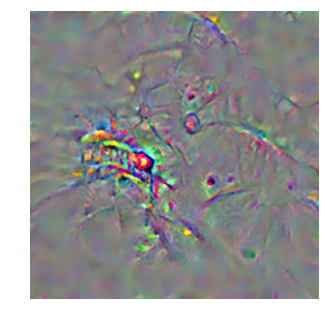

In [55]:
img_copy = img_noise.copy()
imgs = []
for it_i in range(n_iterations):
    print(it_i, end=', ')
    this_res = sess.run(gradient[0], feed_dict={
        x: img_copy,
        layer: layer_vec})[0]
    this_res /= (np.max(np.abs(this_res)) + 1e-8)
    img_copy += this_res * step
    img_copy *= decay
    if it_i % blur_step == 0:
        for ch_i in range(3):
            img_copy[..., ch_i] = gaussian_filter(img_copy[..., ch_i], sigma)
    if it_i % gif_step == 0:
        imgs.append(normalize(img_copy[0]))
make_gif(imgs, saveto='4-gaussian-' + str(neuron_i) + '.gif')

In [56]:
ipyd.Image(url='4-gaussian-962.gif', height=300, width=300)

Now we're really starting to get closer to something that resembles a school bus.

## Clipping the Gradient

Let's now see what happens if we clip the gradient's activations:

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 

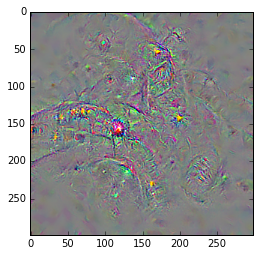

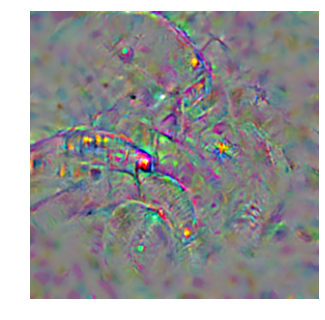

In [57]:
pth = 5
img_copy = img_noise.copy()
imgs = []
for it_i in range(n_iterations):
    print(it_i, end=', ')
    this_res = sess.run(gradient[0], feed_dict={
        x: img_copy,
        layer: layer_vec})[0]
    this_res /= (np.max(np.abs(this_res)) + 1e-8)
    img_copy += this_res * step
    img_copy *= decay
    if it_i % blur_step == 0:
        for ch_i in range(3):
            img_copy[..., ch_i] = gaussian_filter(img_copy[..., ch_i], sigma)

    mask = (abs(img_copy) < np.percentile(abs(img_copy), pth))
    img_copy = img_copy - img_copy*mask

    if it_i % gif_step == 0:
        imgs.append(normalize(img_copy[0]))

plt.imshow(normalize(img_copy[0]))
make_gif(imgs, saveto='5-clip-' + str(neuron_i) + '.gif')

In [58]:
ipyd.Image(url='5-clip-962.gif', height=300, width=300)

## Infinite Zoom / Fractal

Some of the first visualizations to come out would infinitely zoom into the image, creating a fractal image of the deep dream.  We can do this by cropping the image with a 1 pixel border, and then resizing that image back to the original size.

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

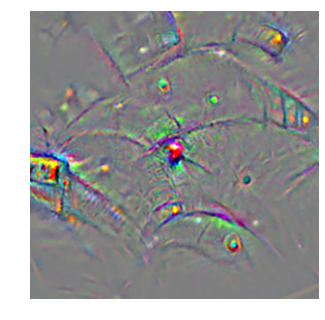

In [59]:
from skimage.transform import resize
img_copy = img_noise.copy()
crop = 1
n_iterations = 1000
imgs = []
n_img, height, width, ch = img_copy.shape
for it_i in range(n_iterations):
    print(it_i, end=', ')
    this_res = sess.run(gradient[0], feed_dict={
        x: img_copy,
        layer: layer_vec})[0]
    this_res /= (np.max(np.abs(this_res)) + 1e-8)
    img_copy += this_res * step
    img_copy *= decay

    if it_i % blur_step == 0:
        for ch_i in range(3):
            img_copy[..., ch_i] = gaussian_filter(img_copy[..., ch_i], sigma)

    mask = (abs(img_copy) < np.percentile(abs(img_copy), pth))
    img_copy = img_copy - img_copy * mask

    # Crop a 1 pixel border from height and width
    img_copy = img_copy[:, crop:-crop, crop:-crop, :]

    img_copy = resize(img_copy[0], (height, width), order=3,
                 clip=False, preserve_range=True
                 )[np.newaxis].astype(np.float32)

    if it_i % gif_step == 0:
        imgs.append(normalize(img_copy[0]))

make_gif(imgs, saveto='6-fractal.gif')

In [60]:
ipyd.Image(url='6-fractal.gif', height=300, width=300)

We can play with a lot of the parameters involved to produce wildly different results.  There are also a lot of extensions to what is presented here currently in the literature including incorporating structure, temporal constraints, variational constraints, and other regularizing methods including making use of the activations in the content image to help infer what features are relevant.

Also, there is no reason to start with an image of noise, or an image of the content. Perhaps we can start with an entirely different image which tries to reflect the process. There are also a lot of interesting published extensions to this technique including image analogies, neural doodle, incorporating structure, and incorporating temporal losses from optical flow to stylize video.


# Resources

Matthew D Zeiler, Rob Fergus.  Visualizing and Understanding Convolutional Networks.  2013.
https://arxiv.org/abs/1311.2901

Karen Simonyan, Andrea Vedaldi, Andrew Zisserman.  Deep Inside Convolutional Networks: Visualising Image Classification Models and Saliency Maps. 2013.

Aravindh Mahendran, Andrea Vedaldi.  Understanding Deep Image Representations by Inverting Them.  2014.
https://arxiv.org/abs/1412.0035

Mordvintsev, Alexander; Olah, Christopher; Tyka, Mike (2015). "Inceptionism: Going Deeper into Neural Networks". Google Research. Archived from the original on 2015-07-03.

Szegedy, Christian; Liu, Wei; Jia, Yangqing; Sermanet, Pierre; Reed, Scott; Anguelov, Dragomir; Erhan, Dumitru; Vanhoucke, Vincent; Rabinovich, Andrew (2014). "Going Deeper with Convolutions". Computing Research Repository. arXiv:1409.4842.

Leon A. Gatys, Alexander S. Ecker, Matthias Bethge. 
A Neural Algorithm of Artistic Style.  2015.  https://arxiv.org/abs/1508.06576

Texture Networks.
http://jmlr.org/proceedings/papers/v48/ulyanov16.pdf

Jost Tobias Springenberg, Alexey Dosovitskiy, Thomas Brox, Martin Riedmiller.  Striving for Simplicity: The All Convolutional Net.  2015.
https://arxiv.org/abs/1412.6806

Yosinski, J., Clune, J., Nguyen, A., Fuchs, T., Lipson, H.  Understanding Neural Networks Through Deep Visualization.  ICML.  2015.
http://yosinski.com/media/papers/Yosinski__2015__ICML_DL__Understanding_Neural_Networks_Through_Deep_Visualization__.pdf